In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

## 붓꽃 데이터 세트에 결정 트리 적용 및 시각화

- DecisionTreeClassifier 이용해 학습한 뒤 
- 규칙 트리 시각화

In [3]:
dt_clf = DecisionTreeClassifier(random_state=156)

iris = load_iris()
x = iris.data
y = iris.target

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=11)
dt_clf.fit(train_x, train_y)

DecisionTreeClassifier(random_state=156)

#### plot_tree

[Text(0.3076923076923077, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [41, 40, 39]'),
 Text(0.23076923076923078, 0.75, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.38461538461538464, 0.75, 'x[3] <= 1.55\ngini = 0.5\nsamples = 79\nvalue = [0, 40, 39]'),
 Text(0.15384615384615385, 0.5833333333333334, 'x[2] <= 5.25\ngini = 0.051\nsamples = 38\nvalue = [0, 37, 1]'),
 Text(0.07692307692307693, 0.4166666666666667, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.23076923076923078, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.5833333333333334, 'x[3] <= 1.75\ngini = 0.136\nsamples = 41\nvalue = [0, 3, 38]'),
 Text(0.38461538461538464, 0.4166666666666667, 'x[0] <= 5.45\ngini = 0.5\nsamples = 4\nvalue = [0, 2, 2]'),
 Text(0.3076923076923077, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.384

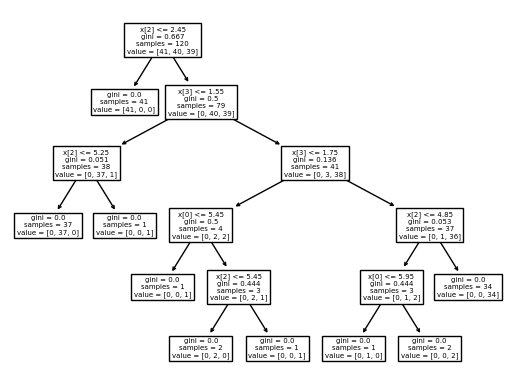

In [4]:
plot_tree(dt_clf)

#### GraphViz로 결정트리 시각화

#### 생성된 .dot 파일 출력 방법 2가지
1. Graphviz 시각화툴 사용 : .dot 파일 읽어서 출력
2. 이미지 파일로 변환해서 저장 후 출력

In [5]:
# .dot 파일 생성
export_graphviz(dt_clf, out_file='output/tree.dot',
    class_names=iris.target_names, feature_names=iris.feature_names, impurity=True, filled=True)

#### 1. graphviz 모듈의 Source() 사용 : .dot 파일 읽어서 출력

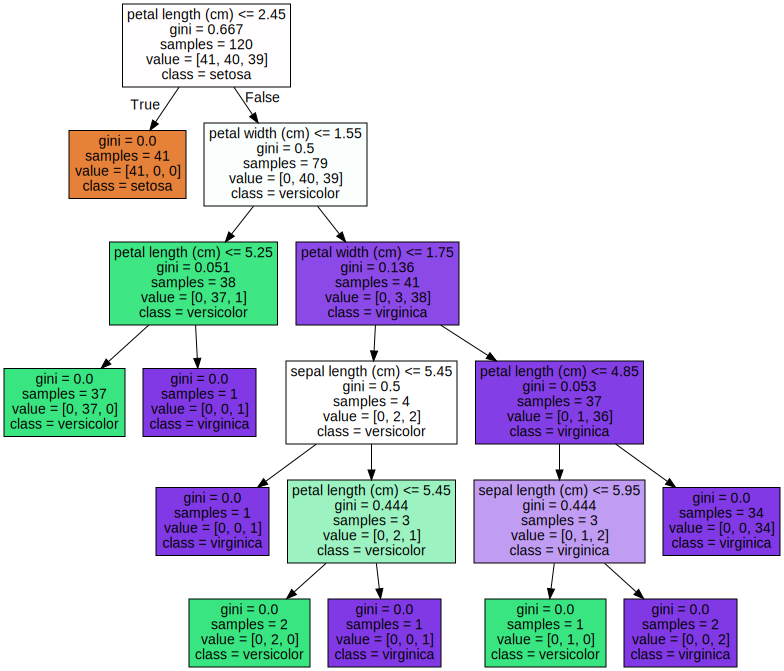

In [6]:
import graphviz

with open('output/tree.dot') as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

#### 2. 생성된 .dot 파일을 .png 파일로 변환해서 저장 후 출력
- 파이썬의 subprocess모듈의 run() 함수를 사용
- https://docs.python.org/ko/3/library/subprocess.html

In [7]:
from subprocess import run
run(['dot','-Tpng','tree.dot','-o','decision_tree.png','-Gdpi=600'])

CompletedProcess(args=['dot', '-Tpng', 'tree.dot', '-o', 'decision_tree.png', '-Gdpi=600'], returncode=2)

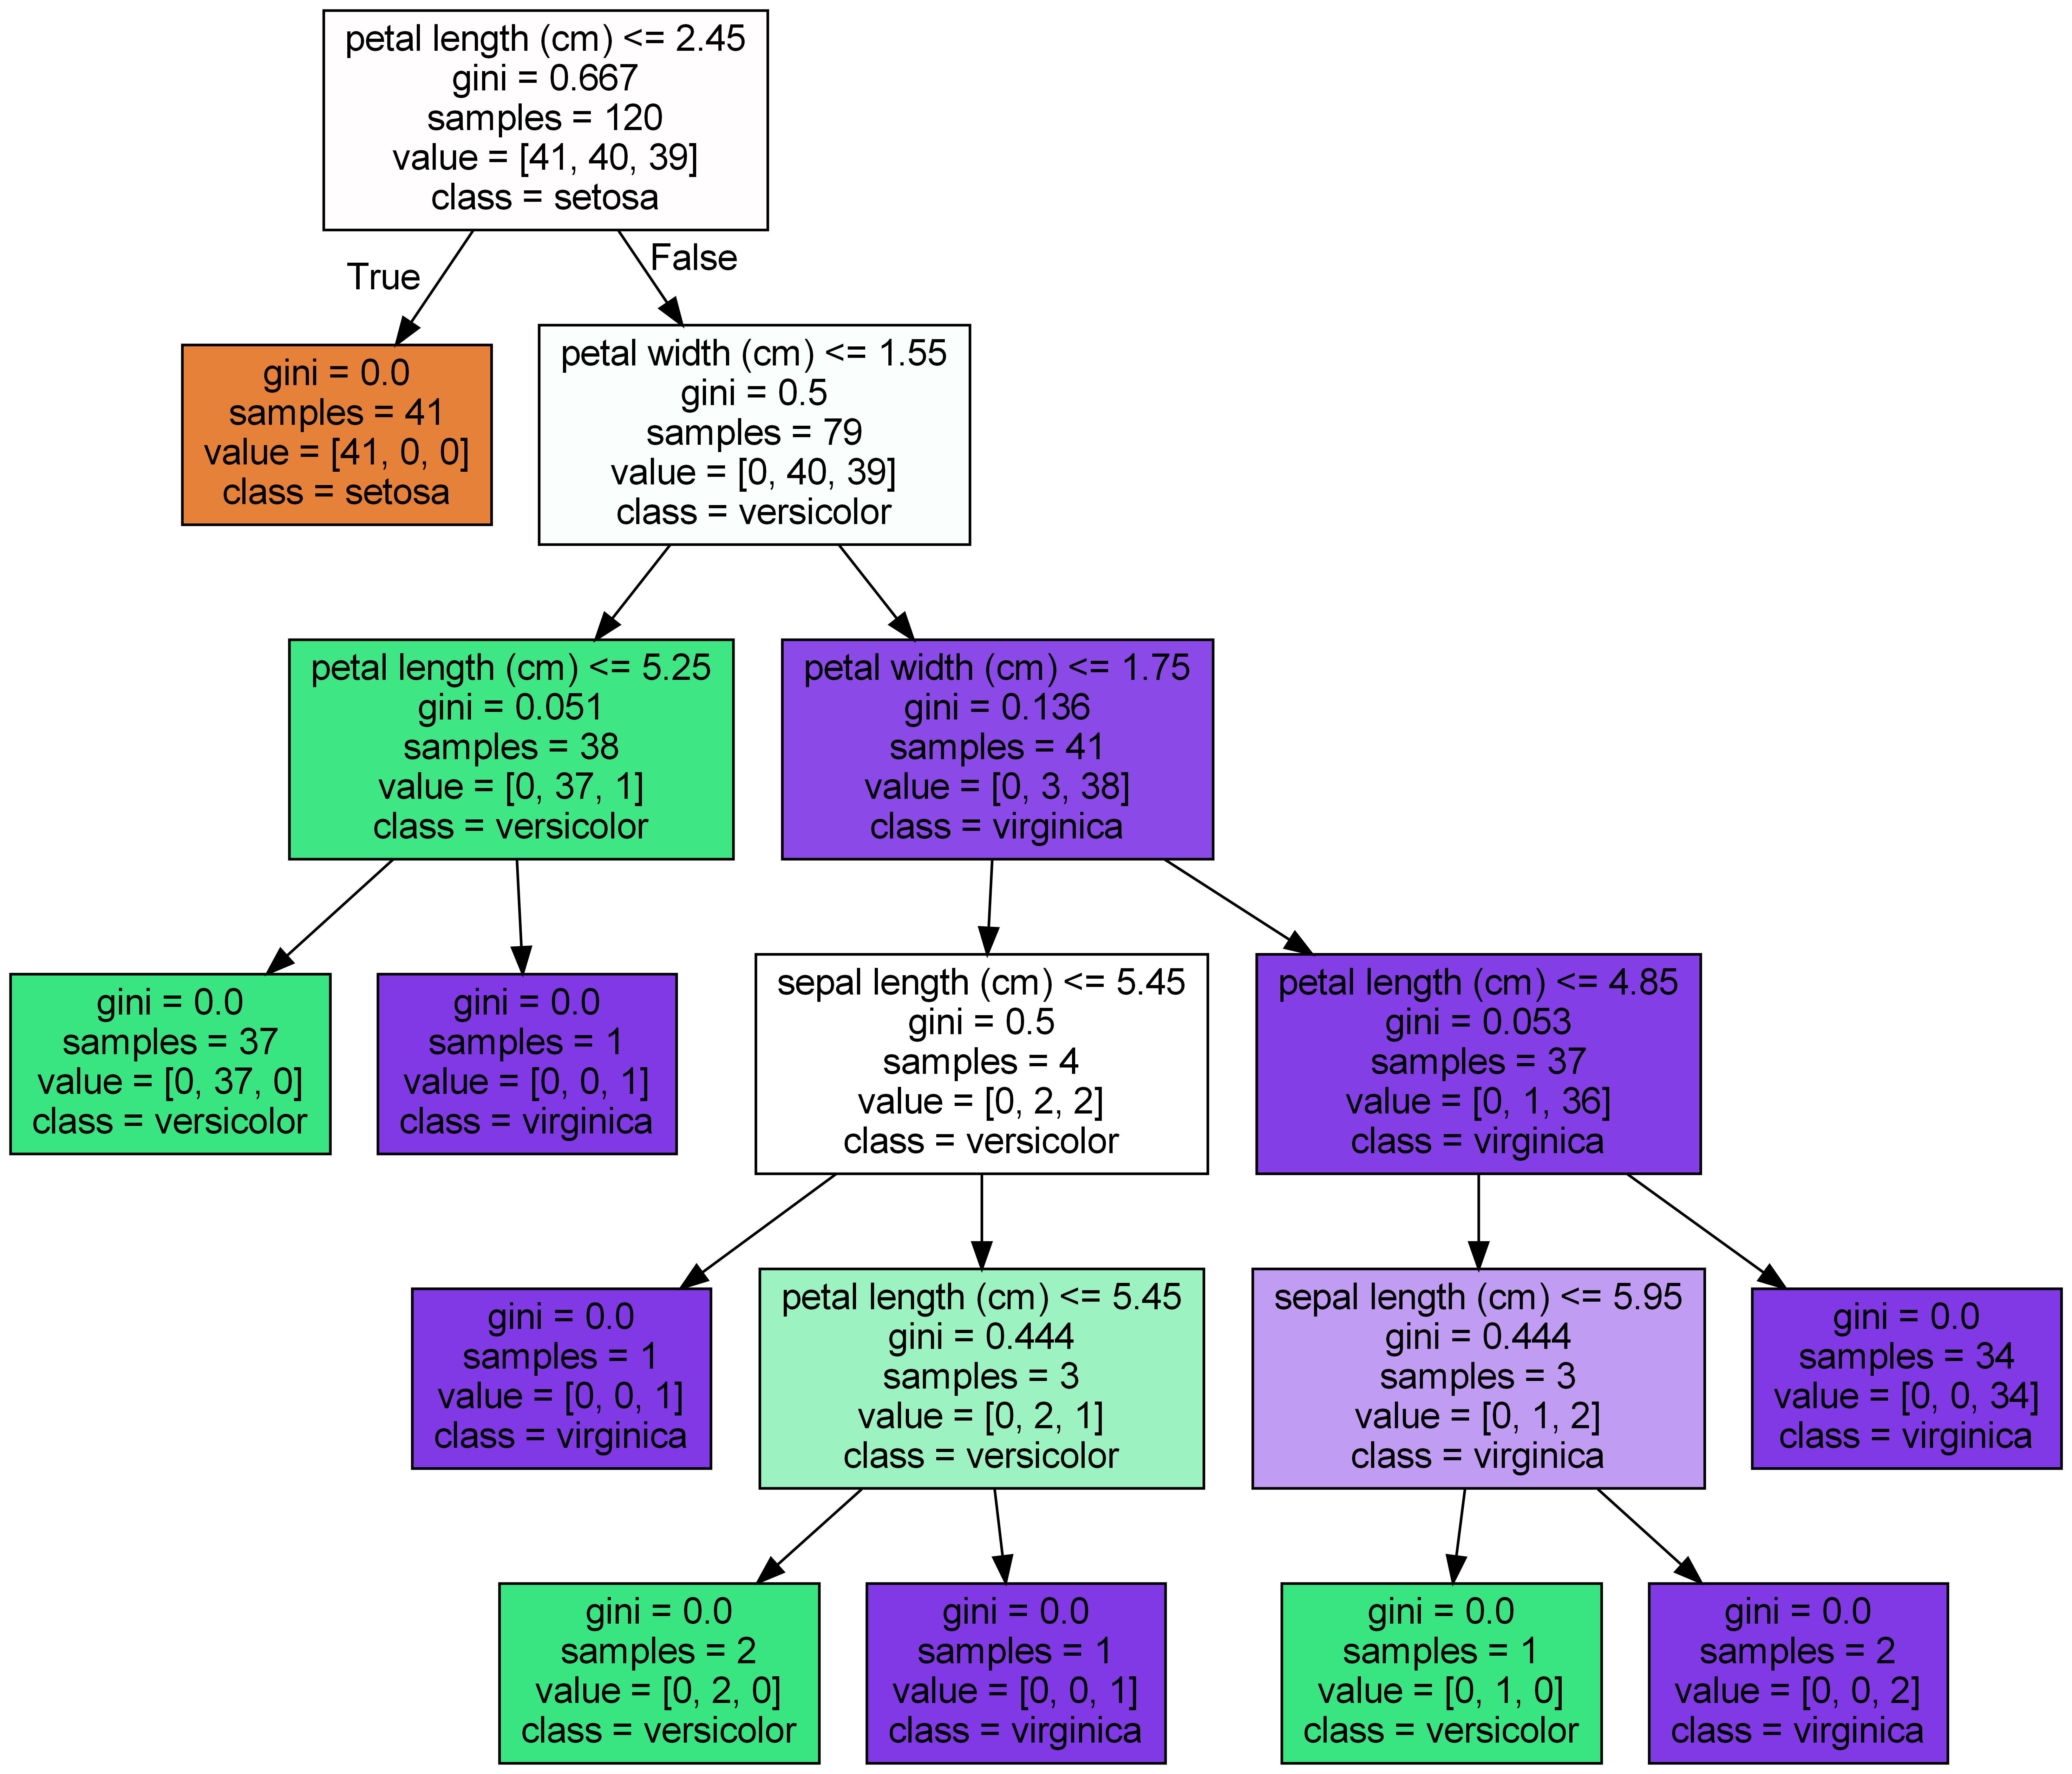

In [8]:
from IPython.display import Image
Image(filename='output/decision_tree.png')

#### 노드 내에 기술된 지표의 의미

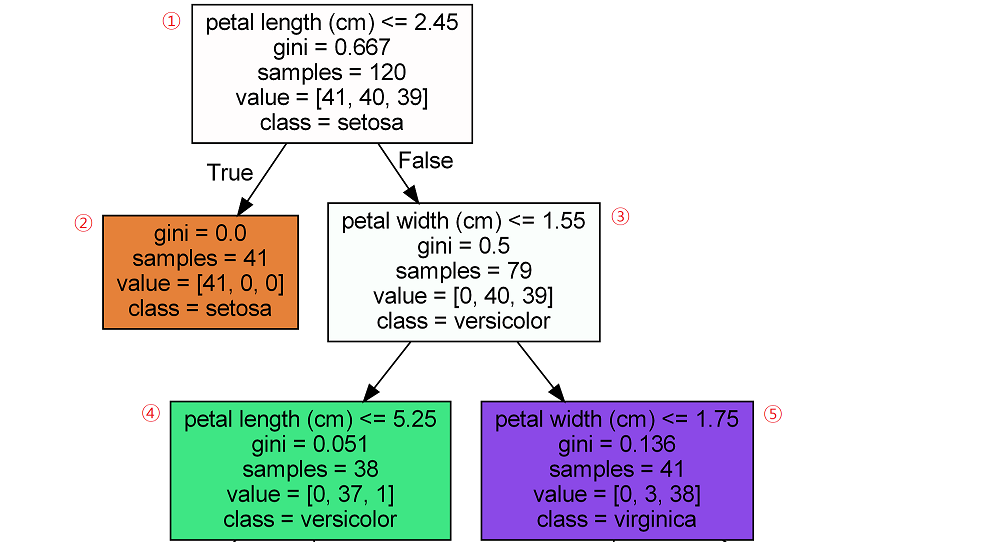

### 결정 트리 하이퍼 파라미터

- 매우 복잡한 규칙 트리가 만들어지면 과적합되는 문제 발생
- 하이퍼 파라미터를 사용하여 복잡한 트리가 생성되지 않도록 제어

- gini: 불순도 -> 노드의 순수도를 측정하는 지표
    - Gini 값이 낮을수록 해당 노드가 더 순수 -> 대부분의 샘플이 동일한 클래스로 분류
<br><br>
- Value: 해당 노드에 있는 샘플의 클래스 분포 / 이는 각 클래스에 속하는 샘플의 수를 의미

- max_depth : 결정 트리의 최대 트리 깊이 제어

- min_samples_split : 자식 규칙 노드를 분할해서 만드는데 필요한 최소 샘플 데이터 개수
    - ex) min_samples_split = 10 -> 어떤 노드를 나누려면 그 노드에 최소 10개의 데이터 sample이 있어야 한다.
    - 만약 10개 미만의 데이터 sample이 있다면, 그 노드는 더 이상 나누어지지 않는다.
<br><br>
    
- min_samples_leaf : 리프 노드가 될 수 있는 최소 샘플 개수
    - 각 리프 노드(더 이상 분할되지 않는 최종 노드)에 최소한 몇 개의 샘플이 있어야 하는지를 정한다.
    - ex) min_samples_leaf = 5 -> 모든 리프 노드는 최소 5개의 데이터 포인트를 포함해야 한다.
    - min_samples_leaf 값을 증가시키면 브랜치 노드가 줄어들고 결정 트리가 더 간결하게 됨   

#### max_depth=3인 경우 결정트리

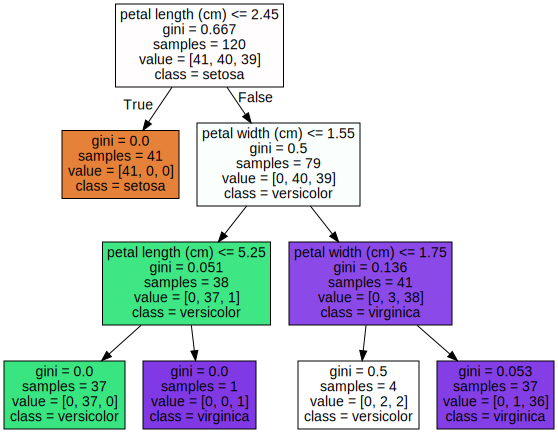

In [9]:
# max_depth = 3
dt_clf = DecisionTreeClassifier(max_depth=3 , random_state=156)
dt_clf.fit(train_x, train_y)

export_graphviz(dt_clf, out_file='output/tree1.dot',
    class_names=iris.target_names, feature_names=iris.feature_names, impurity=True, filled=True)

with open('output/tree1.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

#### max_depth=4인 경우 결정트리

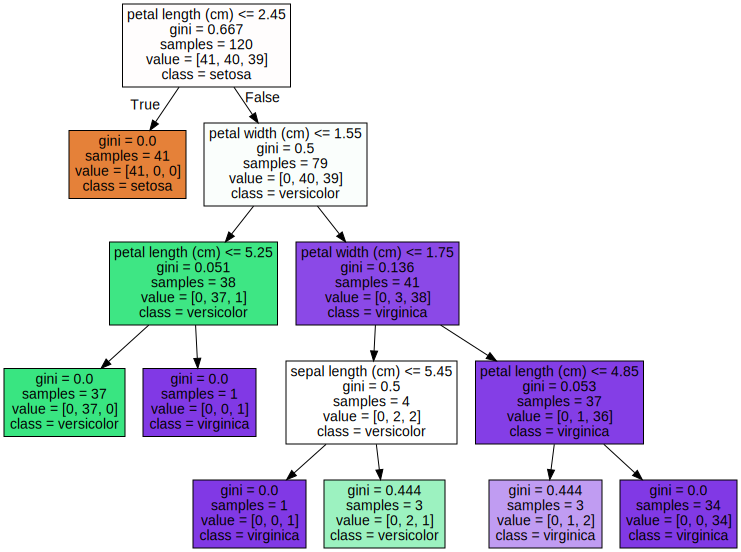

In [14]:
# max_depth = 4
dt_clf = DecisionTreeClassifier(max_depth=4 , random_state=156)
dt_clf.fit(train_x, train_y)

export_graphviz(dt_clf, out_file='output/tree1.dot',
    class_names=iris.target_names, feature_names=iris.feature_names, impurity=True, filled=True)

with open('output/tree1.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

#### min_samples_split=4인 경우 결정트리

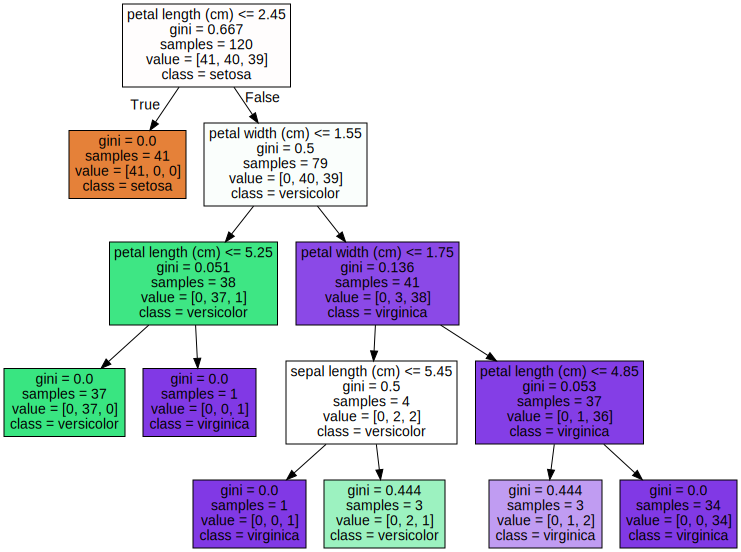

In [11]:
# min_samples_split = 4
dt_clf = DecisionTreeClassifier(min_samples_split=4 , random_state=156)
dt_clf.fit(train_x, train_y)

export_graphviz(dt_clf, out_file='output/tree1.dot',
    class_names=iris.target_names, feature_names=iris.feature_names, impurity=True, filled=True)

with open('output/tree1.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

#### min_samples_split=5인 경우 결정트리

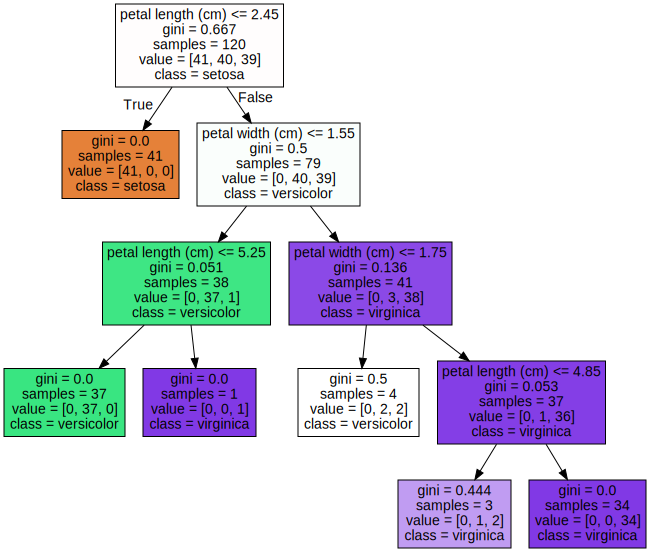

In [12]:
# min_samples_split = 5
dt_clf = DecisionTreeClassifier(min_samples_split=5 , random_state=156)
dt_clf.fit(train_x, train_y)

export_graphviz(dt_clf, out_file='output/tree1.dot',
    class_names=iris.target_names, feature_names=iris.feature_names, impurity=True, filled=True)

with open('output/tree1.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

#### min_samples_leaf=4인 경우 결정트리

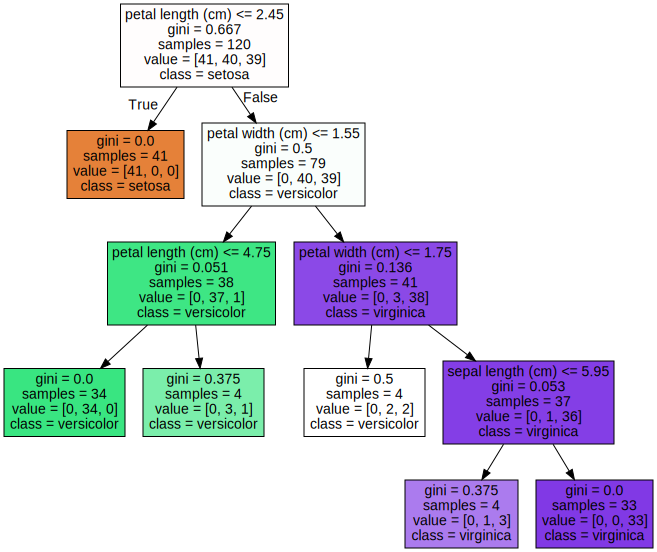

In [38]:
# min_samples_leaf = 4
dt_clf = DecisionTreeClassifier(min_samples_leaf=4 , random_state=156)
dt_clf.fit(train_x, train_y)

export_graphviz(dt_clf, out_file='output/tree1.dot',
    class_names=iris.target_names, feature_names=iris.feature_names, impurity=True, filled=True)

with open('output/tree1.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

-----------------------------------

## feature_importances_ 속성 (피처 중요도)

- tree 생성 시 각 피처가 얼마나 중요한지를 평가한 값

- 피처별 중요도가 0에서 1사이의 수치로 ndarray 형태로 값을 반환
    - 피처 순서대로 값이 할당됨
        - [첫 번째 피처의 중요도, 두 번째 피처의 중요도, ....]


- 값이 높을 수록 해당 피처의 중요도가 높다는 의미
- 특정 노드의 중요도 값이 클수록, 그 노드에서 불순도가 크게 감소됨을 의미함

#### 피처별 중요도 출력

In [18]:
# x의 컬럼 중 tree 생성 시 영향력 출려
list(zip(iris.feature_names, dt_clf.feature_importances_))

[('sepal length (cm)', 0.005947267560959518),
 ('sepal width (cm)', 0.0),
 ('petal length (cm)', 0.5459484001108248),
 ('petal width (cm)', 0.44810433232821567)]

#### 피처별 중요도를 막대그래프로 시각화

In [19]:
for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print(f'{name}: {value:.4f}')

sepal length (cm): 0.0059
sepal width (cm): 0.0000
petal length (cm): 0.5459
petal width (cm): 0.4481


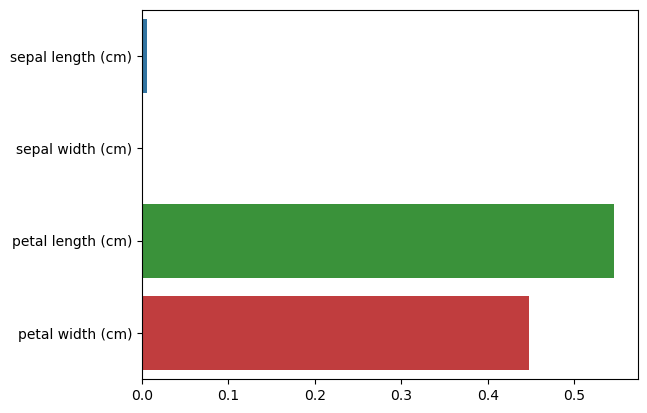

In [20]:
sns.barplot(x = dt_clf.feature_importances_, y= iris.feature_names)
plt.show()

In [29]:
# np.argsort() -> 크기 오름차순으로 정렬한 인덱스 추출
list(reversed(np.argsort(dt_clf.feature_importances_)))

[2, 3, 0, 1]

In [44]:
def plot_importance(clf, feature_names):
    importances = clf.feature_importances_
    idx = list(reversed(np.argsort(importances)))
    ftr_names = [feature_names[i] for i in idx]
    plt.figure(figsize=(5,3))
    sns.barplot(x=importances[idx], y= ftr_names)
    plt.title('Feature Importances')
    plt.show()

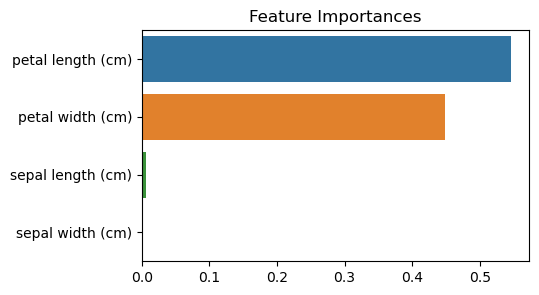

In [45]:
plot_importance(dt_clf, iris.feature_names)

- average='macro': 여러 클래스를 계산 -> 각 클래스별 정밀도를 동일한 가중치로 취급하여 평균을 내는 방식
- average='weighted': 그 클래스의 샘플 수로 가중평균하여 계산
- average='micro': 클래스의 불균형이 있을 때 전체적인 성능을 평가하는 데 유용

In [57]:
# 다진 분류 모델의 성능지표 -> average='macro'
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score

def get_eval_score2(test_y, pred, pred_proba = None):
    
    # 혼동행렬(오차행렬)
    confusion = confusion_matrix(test_y, pred)
    # 정밀도(precision)
    precision = precision_score(test_y, pred, average='macro')
    # 정확도(accuracy_score)
    accuracy = accuracy_score(test_y, pred)
    # 재현율(recall)
    recall = recall_score(test_y, pred, average='macro')
    # F1 score
    f1 = f1_score(test_y, pred, average='macro')
    # G-measure -> 정밀도와 재현율의 기하평균 -> np.sqrt(recall_socre*precision_score)
    g = np.sqrt(recall * precision)

    print(f'confusion matrix:\n{confusion}\n')
    print(f'accuracy: {accuracy:.4f}, precision: {precision:.4f}, recall: {recall:.4f}',end=' ')
    print(f'F1: {f1:.4f}, G: {g:.4f}')
    if pred_proba_c1 is not None:
        auc = roc_auc_score(test_y, pred_proba, average='macro', multi_class='ovo')
        print(f'auc: {auc:.4f}')
    print()

In [53]:
pred_y = dt_clf.predict(test_x)
pred_proba = dt_clf.predict_proba(test_x)
pred_proba

array([[0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.75, 0.25],
       [0.  , 0.5 , 0.5 ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.75, 0.25],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.25, 0.75],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.25, 0.75],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.25, 0.75],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.5 , 0.5 ]])

In [58]:
get_eval_score2(test_y, pred_y, pred_proba)

confusion matrix:
[[ 9  0  0]
 [ 0 10  0]
 [ 0  2  9]]

accuracy: 0.9333, precision: 0.9444, recall: 0.9394 F1: 0.9364, G: 0.9419
auc: 0.9879



### 다중분류 성능지표 이해

In [62]:
from sklearn.metrics import classification_report
true_y = [0,0,0,0,0,1,1,1,1,1,2,2,2,2,2]
pred_y = [0,0,0,0,0,1,1,1,1,2,0,1,1,2,2]

target_names = ['사과','배','딸기']
print(confusion_matrix(true_y, pred_y))
print(classification_report(true_y, pred_y, target_names=target_names))

[[5 0 0]
 [0 4 1]
 [1 2 2]]
              precision    recall  f1-score   support

          사과       0.83      1.00      0.91         5
           배       0.67      0.80      0.73         5
          딸기       0.67      0.40      0.50         5

    accuracy                           0.73        15
   macro avg       0.72      0.73      0.71        15
weighted avg       0.72      0.73      0.71        15



0.6603174603174603

------------------------------